<h1 style="background-color:yellow; "> Table of Contents</h1> <a class="anchor" id="table-of-content"></a>
    
* [1. Problem Background & Motivation](#problem-background)
* [2. Library Importation](#import-package)
* [3. Custom Libraries](#custom-libraries)
* [4. Connect to Data Source and Data Extraction](#data-extraction)
* [5. Exploratory Data Analysis](#data-prep)
* [6. Machine Learning Model](#ml-model)
* [7. Conclusion](#Conclusion)


<h1 style="background-color:powderblue; ">1. Problem Background and Motivation</h1> <a class="anchor" id="problem-background"></a>

<h3> Price Forecasting for Automobiles </h3>

<h2> 1.1 General Info </h2>
 The Automobile sector is a growing industry, it's total revenue was calculated to be 2.86 trillion dollars and expected to grow to 2.95 trillion in 2022.  

<img src="https://www.zippia.com/wp-content/uploads/2021/12/us-car-sales-over-time.jpg" alt="Dashboard for revenue in Automotive Industry" />

>* Based on the above graph, we can see that their was a huge shoot up in car sales but dipped around 2019 due to corona
 
 How could you travel alone without contracting corona? -> your own **Private Vehicle** 
 
 I can confirm this, as I have been in the same industry for 3 years at Harman. It's a growing market with electrification driving the trends. So, **PRICE** is a very important metric for the people to look at cars and buy them.
 
<h2> 1.2 What is the problem? </h2>
 
 The recent pandemic caused by the coronavirus has made people caring about their health so much, that people are preferring to travel in their private vehicles (Car).
 
 So, The Problem statement is that what might be the price of a car ( New / Used ) after 2017? Let it be known that the data can be updated and we expect the model to perform equally well.
 

<h2> 1.3 Interested Party and Reason </h2>

 The interested party who would benefit from this price prediction model is a Pre-owned car sales person or entity like carvana, car.com or vroom.com. For our example, we are designing this model for TempeCarMart, a local car salesman who is establishes since the 90's and want to catch up the latest trend in technology and make more profit( A.K.A Sell Cars)
 
 Advantages of having a ML model with price prediction powers:
  >- The sales person or entity will have a accurate price to set for the pre-owned cars according to the market
  >- During the negotiation of buying a used car, they can use this model to get an idea of how much they can spend to buy that car and make a profit by turnover.
  >- The owner can decide on how much profit he can make, looking at the predicted price with a used car which has been sitting for a long period of time. 

* [Go to Top](#table-of-content) 

<h1 style="background-color:powderblue; ">2. Library Importation</h1> <a class="anchor" id="import-package"></a>
  
  Import the required packages needed for the model.
  

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import math

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

#Stat model
import statsmodels.api as sm

<h1 style ="background-color:powderblue;"> 3. Custom Built Libraries</h1> <a class="anchor" id="custom-libraries"> </a>

In [2]:
def my_summary_stats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp

def target_by_cats(X):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)
  

In [3]:
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

<h1 style="background-color:powderblue; ">4. Data Extraction and Initial Evaluation</h1> <a class="anchor" id="data-extraction"></a>


Read the input data and make sense of it.

In [4]:
# Read in data - To see what the data can tell us
url = 'https://github.com/Bhyrav17/Telco_Churn_prediction/blob/main/Data/telco_customer_churn.csv?raw=true'
df = pd.read_csv(url, index_col=0)

# get the last 10 records to get a count of the records and see the column data
df.tail(10) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11904,BMW,Z8,2002,premium unleaded (required),394.00,8.00,MANUAL,rear wheel drive,2.00,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000
11905,BMW,Z8,2003,premium unleaded (required),394.00,8.00,MANUAL,rear wheel drive,2.00,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,131500
11906,Acura,ZDX,2011,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46020
11907,Acura,ZDX,2011,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56570
11908,Acura,ZDX,2011,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.00,6.00,AUTOMATIC,front wheel drive,4.00,Luxury,Midsize,Sedan,26,17,61,28995


In [5]:
# check number of rows with non null values and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

> **Initial Evaluation - Notes on Findings**<br><br>
>**Observations:**<br>
>>**11914 Records**<br><br>
>>**Outcome:** The target variable is **MSRP**<br>

The below table is just assumptions made with the given data with logical aspects.


| Features          | Thoughts/Expectations                     	|
|------------------	|-------------------------------------------	|
| Make:             | Highly correlated, because brand matters(+)   |
| Model:      	    | Maybe (+)                       	            |
| Year: 	        | not sure this will impact price (neutral) 	|
| Engine Fuel Type: | Neutral - maybe change in the future          |	
| Engine HP: 	    | maybe (+) on price                        	|
| Engine Cylinders: | would think (+) on price                  	|
| Transmission Type:| Positive correlation(+)           	        |
| Driven_Wheels:    | Neutral - doesn't matter                	    |
| Number of Doors: 	| Neutral - doesn't matter                    	|
| Market Category:  | Depends on the geography, maybe neutral   	|
| Vehicle Size:   	| positive (+)           	                    |
| Vehicle Style: 	| maybe neutral            	                    |
| highway MPG:    	| Negative (-) if MPG goes down, price goes up  |
| city mpg:         | Negative (-) if MPG goes down, price goes up 	|
| Popularity:       | Positive (+) matters in gig econ          	|


>[Go to Data Extraction](#data-extraction)

<h1 style="background-color:powderblue; ">5. Exploratory Data Analysis</h1> <a class="anchor" id="data-prep"></a>

* [Go to Top of Notebook](#table-of-content)

- [X] [Initial Evaluation](#data-extraction)
- [X] [Initial Cleanup - Duplicates and missing values](#missing-values)
- [X] [Outlier Detection & Treatment](#outliers-treatment)
- [X] [Feature Selection](#feature-selection)
- [X] [Feature Transformations](#feature-transformations)
- [X] [Data Partitioning](#data-split)


> <h3 style="color:MediumSeaGreen;"> Initial Cleanup - dupes, missing values </h3> <a class="anchor" id="missing-values"></a>

In [6]:
df.columns = df.columns.str.replace(' ', '_') # replacing the spaces in the columns with underscore 

In [7]:
df.isnull().sum()  #isnull() counts all the nulls in the columns and sum() adds them up for every column

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
# check for null values - Visually represented to check for the null values
#sns.heatmap(df.isnull(),cbar=False,cmap='inferno')

In [9]:
# Removing any duplicate records to clean our data
print('Number of records:', len(df))
df.drop_duplicates(inplace=True)
print('Number of records after dropping dupes:', len(df))

Number of records: 11914
Number of records after dropping dupes: 11199


In [10]:
df.columns             

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [11]:
df = df.drop('Market_Category',axis=1) #Dropping Market Category as it has lot of null values

# drop all rows that contain missing values
df = df.dropna()
print('Number of records after dropping missing values:', len(df))

Number of records after dropping missing values: 11097


In [12]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Vehicle_Size         0
Vehicle_Style        0
highway_MPG          0
city_mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [13]:
# Change data types for the following variables
df['Number_of_Doors'] = df['Number_of_Doors'].astype(np.int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11097 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11097 non-null  object 
 1   Model              11097 non-null  object 
 2   Year               11097 non-null  int64  
 3   Engine_Fuel_Type   11097 non-null  object 
 4   Engine_HP          11097 non-null  float64
 5   Engine_Cylinders   11097 non-null  float64
 6   Transmission_Type  11097 non-null  object 
 7   Driven_Wheels      11097 non-null  object 
 8   Number_of_Doors    11097 non-null  int64  
 9   Vehicle_Size       11097 non-null  object 
 10  Vehicle_Style      11097 non-null  object 
 11  highway_MPG        11097 non-null  int64  
 12  city_mpg           11097 non-null  int64  
 13  Popularity         11097 non-null  int64  
 14  MSRP               11097 non-null  int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 1.4+ MB


In [15]:
#sns.boxplot(x='city_mpg',data=df)

In [16]:
#df.sort_values(by='MSRP',ascending=False).iloc[0:10,:]

> **Initial Cleanup:** <br>
> *Summary*<br>
>>- Replaced all spaces in columns with _ for better readability<br>
>>- Dropped all the duplicates rows and kept only single copy of them<br>
>>- Checked for null values and dropped 'Market Category' as it had too many null values<br>
>>- Dropped the rest of rows with null values<br>
>>- Converted No.OF.Doors to int rather than float as it is logical that we can't have 2.4 doors<br>

>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Outlier Detection & Treatment </h3> <a class="anchor" id="outliers-treatment"></a>

In [17]:
DataTypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_temp = df.select_dtypes(include=DataTypes)


my_summary_stats(df,df_temp.columns)

,mean,median,std_dev,min_val,max_val,outlier_issue
Year,2010.69,2015.00,7.24,1990.00,2017.00,False
Engine_HP,253.53,240.00,110.16,55.00,1001.00,False
Engine_Cylinders,5.69,6.00,1.77,0.00,16.00,False
Number_of_Doors,3.45,4.00,0.87,2.00,4.00,False
highway_MPG,26.27,25.00,7.48,12.00,354.00,False
city_mpg,19.30,18.00,6.60,7.00,137.00,False
Popularity,1557.21,1385.00,1443.81,2.00,5657.00,False
MSRP,41901.12,30600.00,61730.62,2000.00,2065902.00,False


<AxesSubplot:>

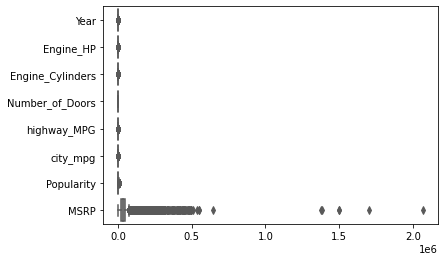

In [18]:
sns.boxplot(data=df,orient='h',palette='Set2')

**Note**:- <br>
 Even though there was no outliers found while the descriptive statistics function was run, when I ran some of the predictor variables through a scatterplot. There were outliers found, which will be removed in the below steps.

In [19]:
df.drop(df[df['MSRP'] >= 500000].index,inplace=True) #because the last car was bugatti veyron

df.drop(df[df['MSRP'] < 10000].index,inplace=True) #Too many old cars 

Woohoh! There was a car which cost almost +$2M. I definitely want to check out which car is that. Let's see!

<img src=https://www.carscoops.com/wp-content/uploads/2022/08/2012-Bugatti-Veyron-16.4-Grand-Sport-Vitesse-1.jpg />
 
>- **Nice Car** But it's very highly unlikely that a pre-owned car salesman would have a bugatti veyron 16.4 lying around :P. Hence, dropping some luxury cars above $500k 

>- Dropping Cars which are priced below $10K as they are old cars which will not be produced any more and makes no sense including it.

In [20]:
#  Q1 = df.quantile(0.25)     Tried to Outlier treatment via IQR method to check if the performance metrics increases. 
#  Q3 = df.quantile(0.75)     Observed that if IQR method is used, the data gets normalized and we don't need to take log transformation
#  IQR = Q3 - Q1
#  print(IQR)

In [21]:
#  df = df[~((df < (Q1 - 1.5*IQR))|(df > (Q3 + 1.5*IQR))).any(axis = 1)]         Dropping values with the intervals mentioned
#  df.shape

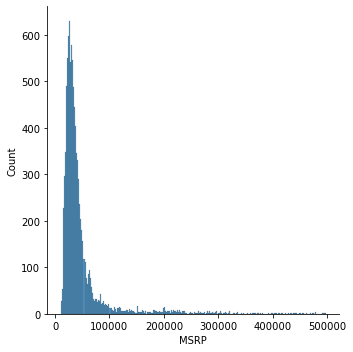

In [22]:
sns.displot(df.MSRP) #Plotting a distribution plot for the MSRP and determined its heavily skewed to the left

In [23]:
df['MSRP'].skew() #adding numbers to theory that its skewed

4.581256247630788

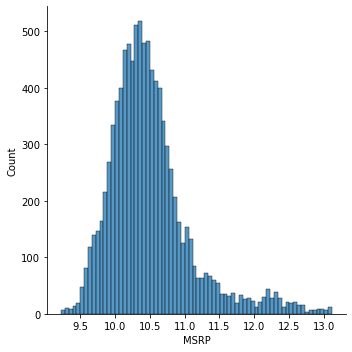

In [24]:
sns.displot(np.log1p(df.MSRP)) # One way to normalize the data

> **Outlier Detection: Summary of Actions**<br>
<br>
>**Note:**<br>
We removed outliers for **MSRP**<br>
We know we have a problem with the distribution of MSRP with a left skewness of 4.58. <br>
As this is our target variable and we are performing regression analysis, we apply **LOG** transformation to make it close to a Normal Distribution.


>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Feature Selection</h3> <a class="anchor" id="feature-selection"></a>

In [25]:
df.select_dtypes(include=DataTypes).corr().round(3)

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP
Year,1.00,0.19,-0.10,0.13,0.28,0.24,0.13,0.06
Engine_HP,0.19,1.00,0.82,-0.22,-0.48,-0.52,0.04,0.72
Engine_Cylinders,-0.10,0.82,1.00,-0.18,-0.62,-0.64,0.02,0.66
Number_of_Doors,0.13,-0.22,-0.18,1.00,0.09,0.13,-0.05,-0.27
highway_MPG,0.28,-0.48,-0.62,0.09,1.00,0.84,-0.01,-0.30
city_mpg,0.24,-0.52,-0.64,0.13,0.84,1.00,0.01,-0.32
Popularity,0.13,0.04,0.02,-0.05,-0.01,0.01,1.00,-0.06
MSRP,0.06,0.72,0.66,-0.27,-0.30,-0.32,-0.06,1.00


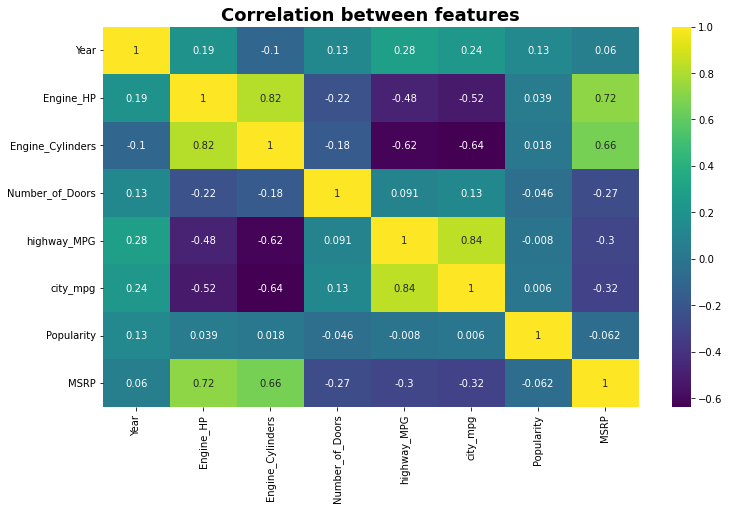

In [26]:
#Plotting heat map to visualize the correlations - More user friendly than to check with the numbers and signs.  
#I'm choosing to share this map as it makes life easier by letting us find the strong/weak correlations faster
df_corr=df.corr().round(3)
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(df_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

>**Note:**<br>
>Features with Strong/Weak Correlations :
>1. Engine_HP (+)
>2. Engine_Cylinders (+)
>3. city MPG (-)
>4. Highway MPG (-)
>5. Number of doors (-)
<br>
<br>

In [27]:
#CrossCorrelation check
df[['Engine_HP','Engine_Cylinders','city_mpg',
    'highway_MPG']].corr().round(2)

,Engine_HP,Engine_Cylinders,city_mpg,highway_MPG
Engine_HP,1.00,0.82,-0.52,-0.48
Engine_Cylinders,0.82,1.00,-0.64,-0.62
city_mpg,-0.52,-0.64,1.00,0.84
highway_MPG,-0.48,-0.62,0.84,1.00


>**Decision:**<br>
>1. We only need one of (Engine_HP or Engine_Cylinder) - I'm going with 'Engine HP' because I think it makes more sense to the consumer<br>
>2. Keep 'Number of door' as it is only mildy correlated with bedrooms
>3. Keep one between City MPG Or Highway MPG - Going with City MPG because most of the consumers move around the city more than the highway
<br><br>

> Final Set of Numerical Vars:<br>
>- Engine_HP (+)
>- City MPG (-)
>- Number of doors (-)

In [28]:
# Dropping all numerical vars not in the final list above
df = df.drop(['Engine_Cylinders','highway_MPG'], axis=1)

>[Go to Data Prep Index](#data-prep)

><h3>Categorical Variables</h3> </br>
    Sneak peak into the Categorical variables, making sense of it and cleaning it.

In [29]:
df.head() #making sure what is their in Data frame

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.00,MANUAL,rear wheel drive,2,Compact,Coupe,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.00,MANUAL,rear wheel drive,2,Compact,Convertible,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.00,MANUAL,rear wheel drive,2,Compact,Coupe,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.00,MANUAL,rear wheel drive,2,Compact,Coupe,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.00,MANUAL,rear wheel drive,2,Compact,Convertible,18,3916,34500


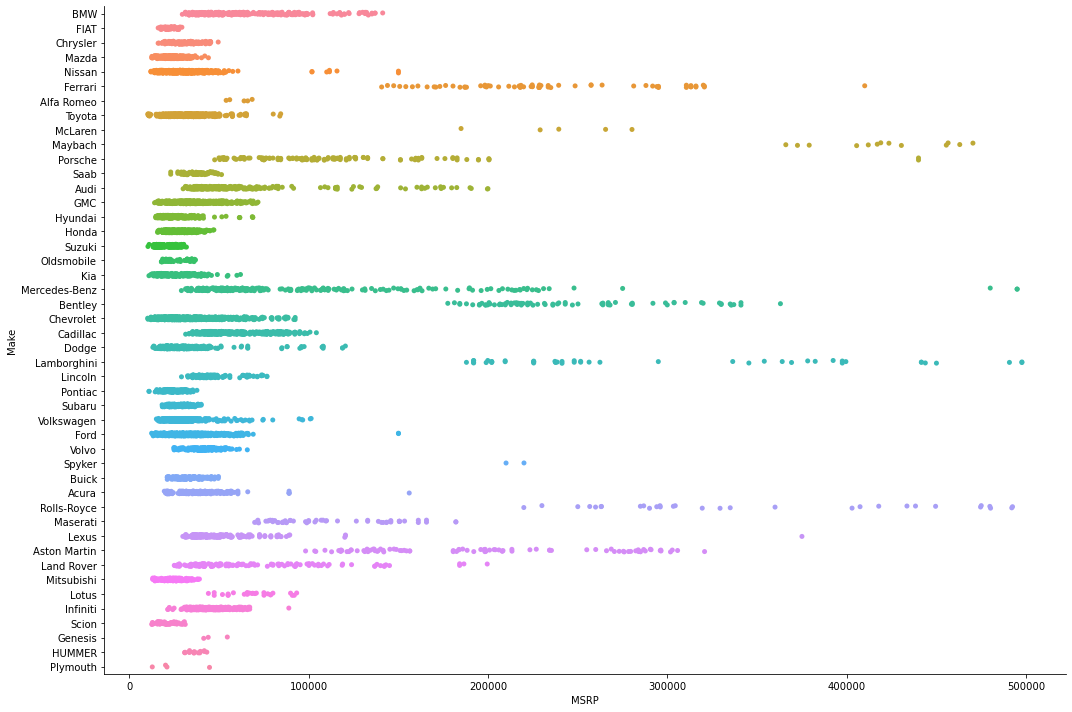

In [30]:
sns.catplot(data=df,x='MSRP',y='Make',height=10,aspect=1.5)

**Note:** <br>
>  The above catplot explains us the distribution of cars across the whole price range and also giving us a clear picture that all the care below 10k and above 500k has been removed.

In [31]:
# Create temp dataframe with target and categorical variables only
categorical = ['object']
X = pd.merge(df['MSRP'],df.select_dtypes(include=categorical),left_index=True,right_index=True)

X.head()

,MSRP,Make,Model,Engine_Fuel_Type,Transmission_Type,Driven_Wheels,Vehicle_Size,Vehicle_Style
0,46135,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
1,40650,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
2,36350,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
3,29450,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
4,34500,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible


In [32]:
X.shape

(9731, 8)

In [33]:
# Compute average target values for all categorical alternatives
target_by_cats(X)

,mean,diff
Make,,
Acura,40643.79,-5532.84
Alfa Romeo,61600.00,15423.37
Aston Martin,198123.46,151946.83
Audi,61413.03,15236.40
BMW,63949.55,17772.92
Bentley,247169.32,200992.69
Buick,32937.11,-13239.52
Cadillac,58500.03,12323.40
Chevrolet,32391.35,-13785.28


,mean,diff
Model,,
1 Series,38276.67,-7899.96
1 Series M,46135.00,-41.63
124 Spider,26895.00,-19281.63
2,15821.67,-30354.96
2 Series,41697.06,-4479.57
...,...,...
iQ,16168.75,-30007.88
tC,21546.43,-24630.20
xA,12996.67,-33179.96


,mean,diff
Engine_Fuel_Type,,
diesel,42840.32,-3336.31
electric,34511.92,-11664.71
flex-fuel (premium unleaded recommended/E85),48641.92,2465.29
flex-fuel (premium unleaded required/E85),160692.26,114515.63
flex-fuel (unleaded/E85),37093.04,-9083.59
natural gas,28065.00,-18111.63
premium unleaded (recommended),41761.78,-4414.85
premium unleaded (required),97554.04,51377.41
regular unleaded,29154.70,-17021.93


,mean,diff
Transmission_Type,,
AUTOMATED_MANUAL,93342.83,47166.20
AUTOMATIC,44320.76,-1855.87
DIRECT_DRIVE,33620.00,-12556.63
MANUAL,39676.42,-6500.21


,mean,diff
Driven_Wheels,,
all wheel drive,56822.51,10645.88
four wheel drive,42776.64,-3399.99
front wheel drive,26520.29,-19656.34
rear wheel drive,66034.41,19857.78


,mean,diff
Vehicle_Size,,
Compact,39647.92,-6528.71
Large,60538.90,14362.27
Midsize,43543.22,-2633.41


,mean,diff
Vehicle_Style,,
2dr Hatchback,22737.44,-23439.19
2dr SUV,28242.48,-17934.15
4dr Hatchback,23580.13,-22596.50
4dr SUV,41638.27,-4538.36
Cargo Minivan,22803.73,-23372.90
Cargo Van,27688.37,-18488.26
Convertible,90059.79,43883.16
Convertible SUV,26850.00,-19326.63
Coupe,85712.93,39536.30


>**Assessment of Categorical Variables:**<br>
<br>
>Predictors that seem to matter<br>
>1. **Make** (60+ Unique values - Need to bucket them)
>2. **Engine_Fuel_Type** (9 unique values)
>3. **Transmission_Type** (4 unique values)
>4. **Driven_Wheels** (4 unique values)
>5. **Vehicle_Size** (3 values - does matter( single, family or adventurer))
<br>

>Drop:<br>
>- Model ( Has 729 values - Doesn't matter as i'm considering the Make and Size of the vehicle)
>- Vehicle_Style

In [34]:
df = df.drop(['Model','Vehicle_Style'], axis=1)

> **Feature Selection:** <br>
> *Summary*<br>
>>- Dropped numerical vars that were not highly correlated with MSRP<br>
>>- Dropped useless/Not relevant categorical variables<br>

>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Feature Transformation</h3> <a class="anchor" id="feature-transformations"></a>

>- **MAKE** has a lot of values, Hence bucketing them to top 5 and other categories<br>
>- Encoding the categorical variables to binary variables<br>
>- Apply Log transformation to MSRP<br>

In [35]:
df['Make'].describe() #Glimpse of the top brand and unique brands exisiting within the data set

count          9731
unique           46
top       Chevrolet
freq            953
Name: Make, dtype: object

In [36]:
# Keep top 5 Makes and label all the rest as "OTHER"
keep = df['Make'].value_counts().index[:5]

keep #check which are the top 5 brands

Index(['Chevrolet', 'Ford', 'Toyota', 'Volkswagen', 'Nissan'], dtype='object')

In [37]:
df['Make'] = np.where(df['Make'].isin(keep), df['Make'], 'OTHER') #Bucketing 

In [38]:
# Create a new version of 'MSRP' - a log tranformation
df['ln_MSRP'] = np.log1p(df['MSRP'])

# Flag categorical variables and convert to dummies
cat_vars = ['Make','Vehicle_Size','Engine_Fuel_Type',
            'Transmission_Type','Driven_Wheels']

# Loop over categorical vars and encode each one
for var in cat_vars:
    df[var] = df[var].astype("category")

df = pd.get_dummies(df,columns=cat_vars, prefix_sep='_', drop_first=True)

In [39]:
df #check if dummy variables are created

,Year,Engine_HP,Number_of_Doors,city_mpg,Popularity,MSRP,ln_MSRP,Make_Ford,Make_Nissan,Make_OTHER,Make_Toyota,Make_Volkswagen,Vehicle_Size_Large,Vehicle_Size_Midsize,Engine_Fuel_Type_electric,Engine_Fuel_Type_flex-fuel (premium unleaded recommended/E85),Engine_Fuel_Type_flex-fuel (premium unleaded required/E85),Engine_Fuel_Type_flex-fuel (unleaded/E85),Engine_Fuel_Type_natural gas,Engine_Fuel_Type_premium unleaded (recommended),Engine_Fuel_Type_premium unleaded (required),Engine_Fuel_Type_regular unleaded,Transmission_Type_AUTOMATIC,Transmission_Type_DIRECT_DRIVE,Transmission_Type_MANUAL,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive
0,2011,335.00,2,19,3916,46135,10.74,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,2011,300.00,2,19,3916,40650,10.61,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,2011,300.00,2,20,3916,36350,10.50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,2011,230.00,2,18,3916,29450,10.29,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,2011,230.00,2,18,3916,34500,10.45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.00,4,16,204,46120,10.74,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
11910,2012,300.00,4,16,204,56670,10.95,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
11911,2012,300.00,4,16,204,50620,10.83,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
11912,2013,300.00,4,16,204,50920,10.84,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


> **Feature Transformation:** <br>
> *Summary*<br>
>>- Categorical and Target variables encoded successfully <br>
>>- The first category for each categorical var was dropped with the 'drop_first=True' <br>


>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Data Partition - TTS </h3> <a class="anchor" id="data-split"></a>

>- 1. Encompassing all the predictor variables into a variable X  <br>
>- 2. Encompassing the target variable to variable Y<br>
>- 3. Split the Training and Test Data by 70/30 with random state- 0<br>

In [40]:
#df_temp2 = df.drop(['MSRP'],axis=1)
df_temp2 = df.drop(['ln_MSRP','MSRP'],axis=1)

# Getting all the predictor variables into a single variable
predictors = df_temp2.columns
predictors 

Index(['Year', 'Engine_HP', 'Number_of_Doors', 'city_mpg', 'Popularity',
       'Make_Ford', 'Make_Nissan', 'Make_OTHER', 'Make_Toyota',
       'Make_Volkswagen', 'Vehicle_Size_Large', 'Vehicle_Size_Midsize',
       'Engine_Fuel_Type_electric',
       'Engine_Fuel_Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine_Fuel_Type_flex-fuel (premium unleaded required/E85)',
       'Engine_Fuel_Type_flex-fuel (unleaded/E85)',
       'Engine_Fuel_Type_natural gas',
       'Engine_Fuel_Type_premium unleaded (recommended)',
       'Engine_Fuel_Type_premium unleaded (required)',
       'Engine_Fuel_Type_regular unleaded', 'Transmission_Type_AUTOMATIC',
       'Transmission_Type_DIRECT_DRIVE', 'Transmission_Type_MANUAL',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive'],
      dtype='object')

In [41]:
target = ['ln_MSRP']
#target = ['MSRP']

X = df[predictors]
Y = df[target]

# Split data and test ot
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state=0)

In [42]:
#To check how the data has been split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6811, 26)
(6811, 1)
(2920, 26)
(2920, 1)


>[Go to Data Prep Index](#data-prep)

<h1 style="background-color:powderblue; ">4. Machine Learning </h1> <a class="anchor" id="ml-model"></a>

- [X] [Model1 - Simple Linear Regression](#first-model)
- [X] [Model2 - Multiple Linear Regression with Two Predictor variable ](#second-model)
- [X] [Model3 - Multiple Linear Regression with All Predictor variable](#third-model)


* [Go to Top](#table-of-content)

> **Model 1** <a class="anchor" id="first-model"></a>
<br>
>Info:<br>

>Simple linear regression model:
>- Simple Linear regression model definition is to use a single predictor to predict the outcome
>- Going with the 'Engine-HP' predictor- this variable had the highest correlation with price.
>- Evaluate MAPE - use as simple baseline model for future reference

In [43]:
LR1 = ['Engine_HP']

model = LinearRegression()
model.fit(X_train[LR1],y_train)

print(X_train.shape)
print(y_train.shape)

#print("Training Accuracy :",model.score(X_train[simple_var],y_train))
#print("Testing Accuracy :",model.score(X_test[simple_var],y_test))

# Display Output
train_test_metrics(X_train[LR1],X_test[LR1],y_train,y_test,model)

(6811, 26)
(6811, 1)
        Train   Test
R2       0.76   0.76
Adj-R2   0.76   0.76
MAE      0.21   0.21
MAPE     2.00   2.00
SSE    574.50 241.31


In [44]:
# Since our target variable was tranformed with the natural log function
# we need to do the following conversion of our predictor variable coefficient
# to more easily interpret it
round((math.exp(model.coef_[0])-1)*100,2)

0.47

Text(0, 0.5, 'Predicted Values')

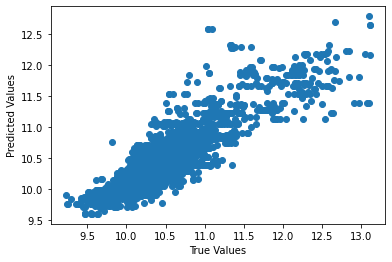

In [45]:
#Plotting graphs to check how well the model predicted the target values
y_pred = model.predict(X_test[LR1])

plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

C:\Users\psupr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

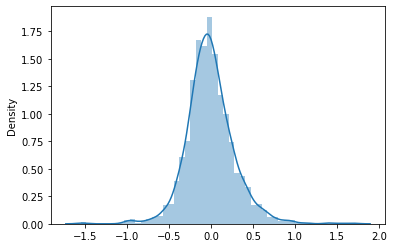

In [46]:
#To visualise how well the model followed the target - Error values
sns.distplot((y_test-y_pred),bins=50)

In [47]:
#Storing the performance metrics in a data frame 
results_df = pd.DataFrame(data=[["Simple Linear Regression", model.score(X_train[LR1],y_train),model.score(X_test[LR1],y_test),r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred).round(3)*100]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','MAPE'])

results_df

,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,MAPE
0,Simple Linear Regression,0.76,0.76,0.76,0.08,0.21,2.00


**MODEL1 - Summary and Questions**<br>

<h5 style="color:red;" > 1. What is the MAPE for your training data? </h5>
  MAPE : 2.000 ( This is in terms of Log(MSRP) )
  
<h5 style="color:red;" > 2. What is the MAPE for your Test data? </h5>
  MAPE : 2.000   ( This is in terms of Log(MSRP) )
  
<h5 style="color:red;" > 3. Is there any evidence of over-fitting?  Explain your answer.? </h5>
  According to the above MAPE values for testing and training data, it's an indicator that the model is not overfitting and is the perfect fit.
  
<h5 style="color:red;" > 4. In words, how would you describe the parameter estimate of the single feature in your model? </h5>
   As it was a single parameter, I picked the most obvious numerical feature which is Highly correlated with our target variable. This leads to a singular dependency and hence can expect the values(MAPE) to be close.
   
   What this actually means is that if the Engine HP is to be increased by 1 unit ( 1 Horse power ), then the average MSRP will increase by 0.47% which is given by the parameter estimates.

> **Model 2** <a class="anchor" id="second-model"></a>
<br>
>Multiple linear regression model with 2 variables:

>- This type of linear regression can use two or more predictors to predict the outcome
>- Going with the 'Engine-HP' predictor- this variable had the highest correlation with price as the numerical feature.
>- Introducing  predictors as intercept shifters and slope shifter - The EngineHP with the Make_Ford as it is one of the top selling cars in the market

In [48]:
#including intercept and slope shifters
X_train = X_train.assign(HP_X_Ford = X_train['Engine_HP'] * X_train['Make_Ford'])
X_test = X_test.assign(HP_X_Ford = X_test['Engine_HP'] * X_test['Make_Ford'])

predictors = ['Engine_HP','Make_Ford', 'HP_X_Ford']

model2 = LinearRegression()
model2.fit(X_train[predictors],y_train)

# Display Output
train_test_metrics(X_train[predictors],X_test[predictors],y_train,y_test,model2)

        Train   Test
R2       0.77   0.77
Adj-R2   0.77   0.77
MAE      0.21   0.21
MAPE     2.00   2.00
SSE    556.55 235.38


In [49]:
# Since our target variable was tranformed with the natural log function
# we need to do the following conversion of our predictor variable coefficient
# to more easily interpret it -1 . Not sure yet.
print('HP effect on Price:', round((math.exp(model2.coef_[0][0])-1)*100,2))
print('HP effect when Make_Ford:', round((math.exp(model2.coef_[0][1])-1)*100,2)+
                                           round((math.exp(model2.coef_[0][2])-1)*100,2)
     )
print('HP effect when not Make_Ford:', round((math.exp(model2.coef_[0][1])-1)*100,2))

print(' Model Coefficients:', model2.coef_)

HP effect on Price: 0.48
HP effect when Make_Ford: 35.54
HP effect when not Make_Ford: 35.71
 Model Coefficients: [[ 0.00479393  0.30538353 -0.00168076]]


Text(0, 0.5, 'Predicted Values')

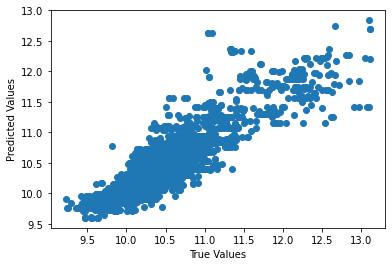

In [50]:
y_pred = model2.predict(X_test[predictors])

plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

C:\Users\psupr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

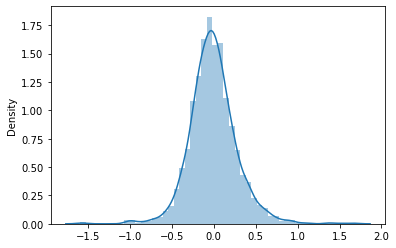

In [51]:
sns.distplot((y_test-y_pred),bins=50)

In [52]:
results_df_2 = pd.DataFrame(data=[["Multiple Linear Regression with 2 Predictors", model2.score(X_train[predictors],y_train),model2.score(X_test[predictors],y_test),r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred).round(3)*100]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','MAPE'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\psupr\AppData\Local\Temp\ipykernel_19960\1542452547.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,MAPE
0,Simple Linear Regression,0.76,0.76,0.76,0.08,0.21,2.00
1,Multiple Linear Regression with 2 Predictors,0.77,0.77,0.77,0.08,0.21,2.00


**MODEL2 - Summary and Questions**<br>

<h5 style="color:red;" > 1. What is the MAPE for your training data? </h5>
  MAPE : 2.000 ( This is in terms of Log(MSRP) )
  
<h5 style="color:red;" > 2. What is the MAPE for your Test data? </h5>
  MAPE : 2.000 ( This is in terms of Log(MSRP) )
  
<h5 style="color:red;" > 3. Is there any evidence of over-fitting?  Explain your answer.? </h5>
  According to the above MAPE values for testing and training data, it's an indicator that the model is not overfitting and is the perfect fit.
  
<h5 style="color:red;" > 4. In words, interpret TWO of the estimated model parameters. </h5>
    HP Ford effect on Price: 0.48 <br>
    HP effect when Make_Ford: 35.54<br>
    HP effect when not Make_Ford: 35.71<br>
   So, if the Engine HP and a car of make Ford is taken, then the MSRP will increase by 35% <br>
   Also if you increase the Engine HP by 1 hp, then the price will increase by 0.48% <br>
   

> **Model 3** <a class="anchor" id="third-model"></a>
<br>

>Multiple linear regression model:
>- Multiple Linear regression model with all the predictor variables

In [53]:
df_temp2 = df.drop(['ln_MSRP','MSRP'],axis=1)

Alp = df_temp2.columns
print(Alp)

model3 = LinearRegression()
model3.fit(X_train[Alp],y_train)

# Display Output
train_test_metrics(X_train[Alp],X_test[Alp],y_train,y_test,model3)

Index(['Year', 'Engine_HP', 'Number_of_Doors', 'city_mpg', 'Popularity',
       'Make_Ford', 'Make_Nissan', 'Make_OTHER', 'Make_Toyota',
       'Make_Volkswagen', 'Vehicle_Size_Large', 'Vehicle_Size_Midsize',
       'Engine_Fuel_Type_electric',
       'Engine_Fuel_Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine_Fuel_Type_flex-fuel (premium unleaded required/E85)',
       'Engine_Fuel_Type_flex-fuel (unleaded/E85)',
       'Engine_Fuel_Type_natural gas',
       'Engine_Fuel_Type_premium unleaded (recommended)',
       'Engine_Fuel_Type_premium unleaded (required)',
       'Engine_Fuel_Type_regular unleaded', 'Transmission_Type_AUTOMATIC',
       'Transmission_Type_DIRECT_DRIVE', 'Transmission_Type_MANUAL',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive'],
      dtype='object')
        Train   Test
R2       0.83   0.83
Adj-R2   0.83   0.83
MAE      0.18   0.17
MAPE     1.70   1.60
SSE    407.56 170.26


Text(0, 0.5, 'Predicted Values')

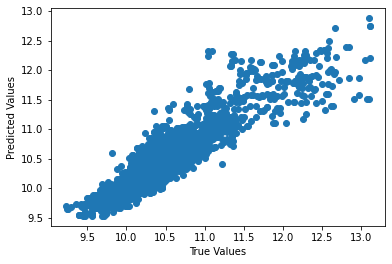

In [54]:
y_pred = model3.predict(X_test[Alp])

plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

C:\Users\psupr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

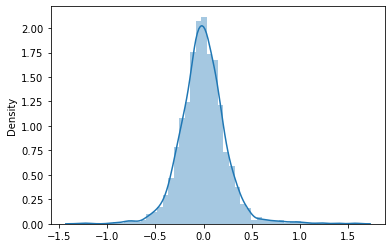

In [55]:
sns.distplot((y_test-y_pred),bins=50)

In [56]:
results_df_3 = pd.DataFrame(data=[["Multiple Linear Regression with All Predictors", model3.score(X_train[Alp],y_train),model3.score(X_test[Alp],y_test),r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred).round(3)*100]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','MAPE'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

C:\Users\psupr\AppData\Local\Temp\ipykernel_19960\3437862432.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_3, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,MAPE
0,Simple Linear Regression,0.76,0.76,0.76,0.08,0.21,2.00
1,Multiple Linear Regression with 2 Predictors,0.77,0.77,0.77,0.08,0.21,2.00
2,Multiple Linear Regression with All Predictors,0.83,0.83,0.83,0.06,0.17,1.60


**MODEL3 - Summary and Questions**<br>

<h5 style="color:red;" > 1. What is the MAPE for your training data? </h5>
  MAPE : 1.700 ( This is in terms of Log(MSRP) )
  
<h5 style="color:red;" > 2. What is the MAPE for your Test data? </h5>
  MAPE : 1.600   ( This is in terms of Log(MSRP) )
  
<h5 style="color:red;" > 3. Is there any evidence of over-fitting?  Explain your answer.? </h5>
  According to the above MAPE values for testing and training data, it's an indicator that the model is not overfitting as the difference between the two values is not so high.
  


<h1 style="background-color:powderblue; ">5. Conclusion </h1> <a class="anchor" id="Conclusion"></a>

* [Go to Top](#table-of-content)

**Some Q and A**<br>

<h5 style="color:red;" > 1. Are you satisfied with your final model’s performance?  Why or why not? </h5>

>- The amount of time and effort I had to put into this problem set has paid off. After having to go through multiple iterations of data cleaning and running the ML models. I am quite satisfied with my final model performance. 
>- There is no overfitting or underfitting issues with my model. Also, R2 score is just 76% in the first model but has increased in the subsequent models to 83%. Even the MAPE value has reduced stating that the error percentage is also less. 
>- Although I am satisfied with my model's performance for now. I feel like it can be further improved to achieve maximum accuracy and precision.

  
<h5 style="color:red;" > 2. What do you propose for next steps? </h5>
 
>- The next step, maybe is to deploy the model in a server environment. Feed it with actual live data to assess the model's performance 
>- Maybe retrain the model with new data from time to time, to keep it updated? ( not sure about this )
>- Can we make sure the model retains memory of this new live data and learn on its own to improve the prediction in the next run? ( AI becoming smarter than human? )
  
<h5 style="color:red;" > 3. What would you do differently if you could? </h5>

>- I know that I dropped the vehicle_style category, maybe I could have created some labels for it and actually include them in the dataset to check the performance of the model.
>- I dropped some of the null values in the columns of the data, I could have filled in the data by mean or average or by some appropriate method.
>- Try something different like Decision tree, random forest or xgboost ( I still do not understand the hype , but I want to and researching about it )


<h5 style="color:red;" > 4. Based on your findings – what would you want to communicate to business leadership in this industry?   </h5>

>- I would suggest the automotive industry to focus on increasing the Engine Horsepower, but also to keep in mind about the other feature such as city MPG. Try to gain some popularity with the public as it is important for the people to recognize the cars.

>- I would also suggest them that, they price the cars in the range of 10-500k, as that's the range where they got more people to buy their cars and to focus on the luxury cars (above 500k) to niche customers only.
